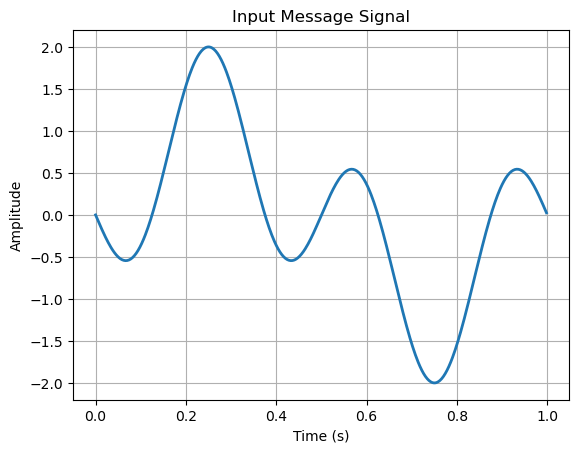

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define time parameters
tot = 1         # total time in seconds
td = 0.002      # time increment
t = np.arange(0, tot, td)

# Define the message signal
x = np.sin(2 * np.pi * t) - np.sin(6 * np.pi * t)

# Plot the message signal
plt.figure()
plt.plot(t, x, linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Input Message Signal')
plt.grid(True)
plt.show()


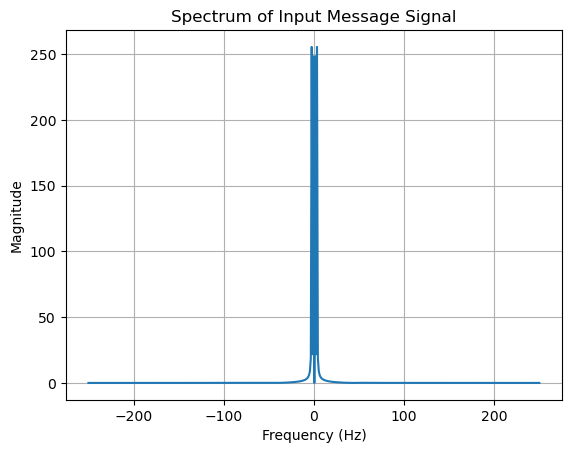

In [2]:
# Compute FFT and define frequency axis
Lfft = 2 ** int(np.ceil(np.log2(len(x))))
fmax = 1 / (2 * td)
Faxis = np.linspace(-fmax, fmax, Lfft)
Xfft = np.fft.fftshift(np.fft.fft(x, Lfft))

# Plot the spectrum
plt.figure()
plt.plot(Faxis, np.abs(Xfft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum of Input Message Signal')
plt.grid(True)
plt.show()


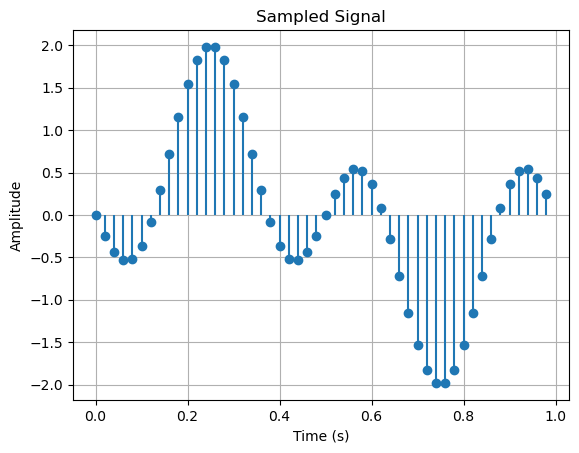

In [3]:
ts = 0.02  # sampling period
n = np.arange(0, tot, ts)
x_sampled = np.sin(2 * np.pi * n) - np.sin(6 * np.pi * n)

# Plot the sampled signal
plt.figure()
plt.stem(n, x_sampled, basefmt=" ")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')
plt.grid(True)
plt.show()


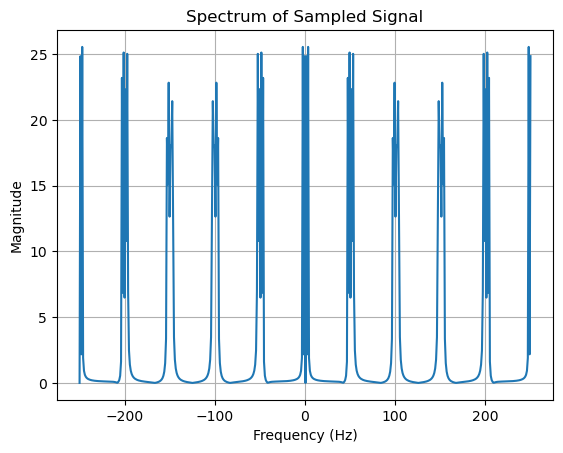

In [4]:
Nfactor = int(ts / td)
x_sampled_upsampled = np.zeros(len(t))
x_sampled_upsampled[::Nfactor] = x_sampled

# Compute FFT for upsampled sampled signal
Lffu = 2 ** int(np.ceil(np.log2(len(x_sampled_upsampled))))
Faxisu = np.linspace(-fmax, fmax, Lffu)
Xfftu = np.fft.fftshift(np.fft.fft(x_sampled_upsampled, Lffu))

plt.figure()
plt.plot(Faxisu, np.abs(Xfftu))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum of Sampled Signal')
plt.grid(True)
plt.show()


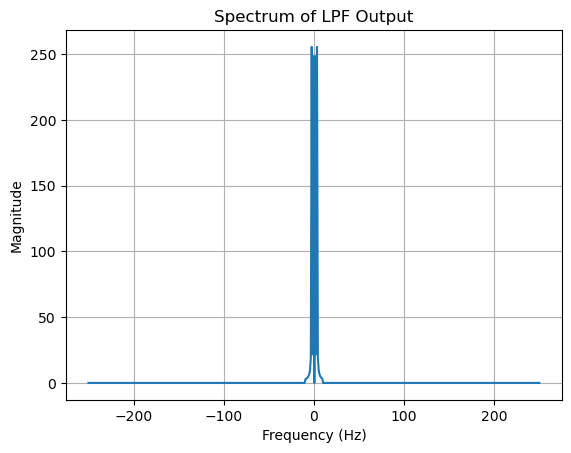

In [5]:
BW = 10
H_lpf = np.zeros(Lffu)
H_lpf[Lffu // 2 - BW:Lffu // 2 + BW] = 1

# Apply the LPF to the FFT of the upsampled signal
x_recv = Nfactor * Xfftu * H_lpf

# Plot the spectrum after filtering
plt.figure()
plt.plot(Faxisu, np.abs(x_recv))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum of LPF Output')
plt.grid(True)
plt.show()


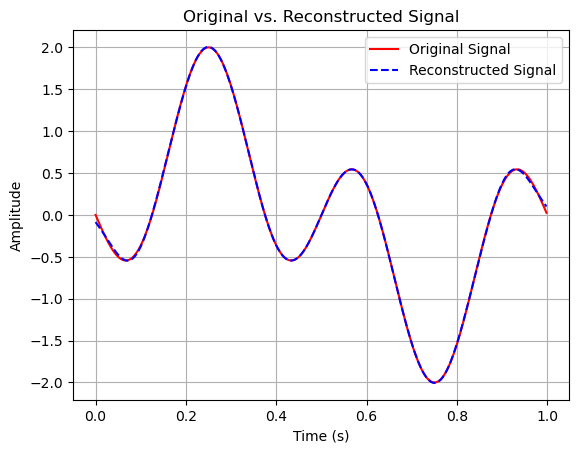

In [6]:
x_recv_time = np.real(np.fft.ifft(np.fft.fftshift(x_recv)))

plt.figure()
plt.plot(t, x, 'r', label='Original Signal')
plt.plot(t, x_recv_time[:len(t)], 'b--', label='Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs. Reconstructed Signal')
plt.legend()
plt.grid(True)
plt.show()


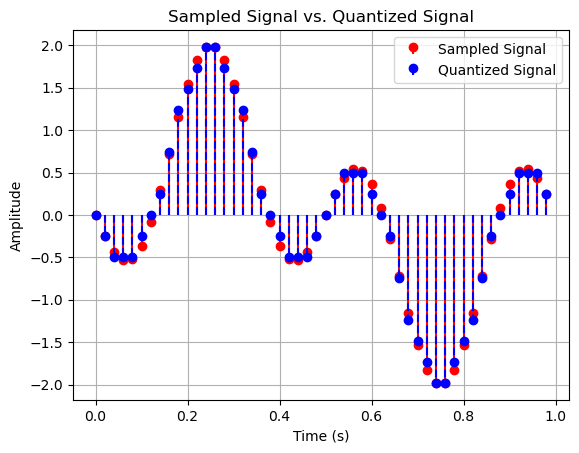

In [7]:
levels = 16
x_min, x_max = np.min(x_sampled), np.max(x_sampled)
step = (x_max - x_min) / levels

# Quantize the sampled signal
x_quantized = step * np.round((x_sampled - x_min) / step) + x_min

# Plot quantized vs. sampled signal
plt.figure()
plt.stem(n, x_sampled, 'r', markerfmt='ro', basefmt=" ", label='Sampled Signal')
plt.stem(n, x_quantized, 'b--', markerfmt='bo', basefmt=" ", label='Quantized Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal vs. Quantized Signal')
plt.legend()
plt.grid(True)
plt.show()
